In [1]:

input_file = 'data/raw/nq_retriever_model_calibration_data.csv'

output_prefix = 'nq-calib-'

total_file = f"data/new/{output_prefix}total.csv"

percent_file = f"data/new/{output_prefix}percent.csv"

latex_file = f"data/new/{output_prefix}table.tex"

figure_path = f"data/new/{output_prefix}percent-figure.pdf"

In [2]:
import pandas as pd


# Read the CSV file
df = pd.read_csv(input_file)

# Define the bin columns (all columns except 'metric' and 'dataset')
bin_cols = df.columns[3:].tolist()

# Compute total related and total samples for each row
df['total_related'] = df[bin_cols].apply(lambda row: sum(int(x.split('|')[0]) for x in row if pd.notna(x)), axis=1)
df['total_samples'] = df[bin_cols].apply(lambda row: sum(int(x.split('|')[1]) for x in row if pd.notna(x)), axis=1)

# Add the '0.0-1.0' column in the format "total_related|total_samples"
df['0.0-1.0'] = df['total_related'].astype(str) + '|' + df['total_samples'].astype(str)

# Save the DataFrame with the new column to 'a.csv'
df.to_csv(total_file, index=False)
df

,metric,retriever,model,0.0-0.1,0.1-0.2,0.2-0.3,0.3-0.4,0.4-0.5,0.5-0.6,0.6-0.7,0.7-0.8,0.8-0.9,0.9-1.0,total_related,total_samples,0.0-1.0
0,cpe,bm25,qwen7b,0|2,0|20,0|53,1|29,1|368,1|573,1|272,29|4728,19|3475,322|28450,374,37970,374|37970
1,cpe,bm25,llama8b,0|4,0|5,0|34,1|99,3|333,1|715,18|2005,41|3208,104|10973,200|20064,368,37440,368|37440
2,cpe,contriever,qwen7b,1|6,0|12,3|33,4|71,6|220,13|380,39|755,174|3288,122|2504,2570|30702,2932,37971,2932|37971
3,cpe,contriever,llama8b,0|0,0|4,2|19,4|85,18|263,31|612,143|1896,254|2929,835|10753,1618|21056,2905,37617,2905|37617
4,cnpe,bm25,qwen7b,0|0,0|1,0|0,0|1,0|9,0|3,0|46,3|434,26|4664,345|32812,374,37970,374|37970
5,cnpe,bm25,llama8b,3|142,2|18,0|64,0|33,2|138,2|277,4|611,11|1649,62|5572,282|28936,368,37440,368|37440
6,cnpe,contriever,qwen7b,0|0,0|0,0|0,0|0,1|5,0|13,2|37,9|155,71|1451,2849|36310,2932,37971,2932|37971
7,cnpe,contriever,llama8b,8|128,2|18,0|50,0|16,7|140,16|220,22|493,82|1400,405|5204,2363|29948,2905,37617,2905|37617
8,cse,bm25,qwen7b,9|1199,4|2520,4|3233,8|3698,14|4441,17|3970,12|2434,29|4685,16|1729,252|9031,365,36940,365|36940
9,cse,bm25,llama8b,0|2990,3|4708,8|5259,15|4617,23|4249,26|3327,28|1854,57|3038,18|1725,189|3862,367,35629,367|35629


In [3]:
# Define a function to compute percentages
def compute_percentages(value, total_samples):
    if pd.isna(value):
        return value
    related, total = map(int, value.split('|'))
    # Calculate related percentage: (related / total) * 100, 0 if total is 0
    related_percentage = (related / total) * 100 if total > 0 else 0
    # Calculate bin percentage: (total / total_samples) * 100
    bin_percentage = (total / total_samples) * 100 if total_samples > 0 else 0
    return f"{related_percentage:.0f}|{bin_percentage:.0f}"

df = pd.read_csv(total_file)
# Transform all bin columns, including '0.0-1.0', to percentage format
for col in bin_cols + ['0.0-1.0']:
    df[col] = df.apply(lambda row: compute_percentages(row[col], row['total_samples']), axis=1)

# Drop the temporary columns used for calculations
df = df.drop(['total_related', 'total_samples'], axis=1)


df.to_csv(percent_file, index=False)
df

,metric,retriever,model,0.0-0.1,0.1-0.2,0.2-0.3,0.3-0.4,0.4-0.5,0.5-0.6,0.6-0.7,0.7-0.8,0.8-0.9,0.9-1.0,0.0-1.0
0,cpe,bm25,qwen7b,0|0,0|0,0|0,3|0,0|1,0|2,0|1,1|12,1|9,1|75,1|100
1,cpe,bm25,llama8b,0|0,0|0,0|0,1|0,1|1,0|2,1|5,1|9,1|29,1|54,1|100
2,cpe,contriever,qwen7b,17|0,0|0,9|0,6|0,3|1,3|1,5|2,5|9,5|7,8|81,8|100
3,cpe,contriever,llama8b,0|0,0|0,11|0,5|0,7|1,5|2,8|5,9|8,8|29,8|56,8|100
4,cnpe,bm25,qwen7b,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|1,1|12,1|86,1|100
5,cnpe,bm25,llama8b,2|0,11|0,0|0,0|0,1|0,1|1,1|2,1|4,1|15,1|77,1|100
6,cnpe,contriever,qwen7b,0|0,0|0,0|0,0|0,20|0,0|0,5|0,6|0,5|4,8|96,8|100
7,cnpe,contriever,llama8b,6|0,11|0,0|0,0|0,5|0,7|1,4|1,6|4,8|14,8|80,8|100
8,cse,bm25,qwen7b,1|3,0|7,0|9,0|10,0|12,0|11,0|7,1|13,1|5,3|24,1|100
9,cse,bm25,llama8b,0|8,0|13,0|15,0|13,1|12,1|9,2|5,2|9,1|5,5|11,1|100


In [4]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(percent_file)

# Replace '|' with '/' in data cells
df = df.applymap(lambda x: str(x).replace('|', '/') if isinstance(x, str) else x)

# Remove '0.0-1.0' column if it exists
if '0.0-1.0' in df.columns:
    df = df.drop('0.0-1.0', axis=1)

# Replace metric column values with full names
metric_replacements = {
    'cpe': 'Confidence using Predictive Entropy',
    'cnpe': 'Confidence using Length-Normalized Predictive Entropy',
    'cse': 'Confidence using Semantic Entropy',
    'cmscp': 'Confidence using Max Semantic Cluster Proportion',
    'mscp': 'Confidence using Max Semantic Cluster Proportion',
}
df['metric'] = df['metric'].replace(metric_replacements)

model_replacements = {
    'qwen7b': 'Qwen7B',
    'llama8b': 'Llama8B',
}
df['model'] = df['model'].replace(model_replacements)

retriever_replacements = {
    'bm25': 'BM25',
    'contriever': 'Contriever',
}
df['retriever'] = df['retriever'].replace(retriever_replacements)

# Add spaces around '/' in numerical columns for better LaTeX formatting
bin_cols = [col for col in df.columns if '-' in col]
for col in bin_cols:
    df[col] = df[col].apply(lambda x: x.replace('/', ' / '))

# Define the order of metrics
metric_order = [
    'Confidence using Predictive Entropy',
    'Confidence using Length-Normalized Predictive Entropy',
    'Confidence using Semantic Entropy',
    'Confidence using Max Semantic Cluster Proportion'
]

# Generate LaTeX table
latex_table = [
    r'\begin{table}[h]',
    r'\centering',
    r'\resizebox{\textwidth}{!}{',
    r'\begin{tabular}{ll' + 'c' * len(bin_cols) + '}',
    r'\hline',
    r'\multirow{2}{*}{Retriever} & \multirow{2}{*}{Model} & \multicolumn{' + str(len(bin_cols)) + r'}{c}{Confidence Bins} \\',
    r' & & ' + ' & '.join(bin_cols) + r' \\',
    r'\hline',
]

for metric in metric_order:
    group = df[df['metric'] == metric]
    # Add metric name spanning all columns
    latex_table.append(r'\multicolumn{' + str(2 + len(bin_cols)) + r'}{c}{\textbf{' + metric + r'}} \\')
    latex_table.append(r'\hline')
    for index, row in group.iterrows():
        # Add row with retriever, model, and bin values
        row_data = [row['retriever'], row['model']] + [row[col] for col in bin_cols]
        latex_table.append(' & '.join(row_data) + r' \\')
    latex_table.append(r'\hline\hline')

latex_table.append(r'\end{tabular}')
latex_table.append(r'}%\resizebox{\textwidth}{!}{')
latex_table.append(r'\end{table}')

# Join the LaTeX lines into a single string
final_latex_table = '\n'.join(latex_table)

# Output the LaTeX table source code
print(final_latex_table)

# Save the generated LaTeX table to a file
with open(latex_file, "w") as f:
    f.write(final_latex_table)

\begin{table}[h]
\centering
\resizebox{\textwidth}{!}{
\begin{tabular}{llcccccccccc}
\hline
\multirow{2}{*}{Retriever} & \multirow{2}{*}{Model} & \multicolumn{10}{c}{Confidence Bins} \\
 & & 0.0-0.1 & 0.1-0.2 & 0.2-0.3 & 0.3-0.4 & 0.4-0.5 & 0.5-0.6 & 0.6-0.7 & 0.7-0.8 & 0.8-0.9 & 0.9-1.0 \\
\hline
\multicolumn{12}{c}{\textbf{Confidence using Predictive Entropy}} \\
\hline
BM25 & Qwen7B & 0 / 0 & 0 / 0 & 0 / 0 & 3 / 0 & 0 / 1 & 0 / 2 & 0 / 1 & 1 / 12 & 1 / 9 & 1 / 75 \\
BM25 & Llama8B & 0 / 0 & 0 / 0 & 0 / 0 & 1 / 0 & 1 / 1 & 0 / 2 & 1 / 5 & 1 / 9 & 1 / 29 & 1 / 54 \\
Contriever & Qwen7B & 17 / 0 & 0 / 0 & 9 / 0 & 6 / 0 & 3 / 1 & 3 / 1 & 5 / 2 & 5 / 9 & 5 / 7 & 8 / 81 \\
Contriever & Llama8B & 0 / 0 & 0 / 0 & 11 / 0 & 5 / 0 & 7 / 1 & 5 / 2 & 8 / 5 & 9 / 8 & 8 / 29 & 8 / 56 \\
\hline\hline
\multicolumn{12}{c}{\textbf{Confidence using Length-Normalized Predictive Entropy}} \\
\hline
BM25 & Qwen7B & 0 / 0 & 0 / 0 & 0 / 0 & 0 / 0 & 0 / 0 & 0 / 0 & 0 / 0 & 1 / 1 & 1 / 12 & 1 / 86 \\
BM25 & L

/var/folders/8s/xt2dtpb54pn2cgl2s5hcd5vm0000gn/T/ipykernel_32618/725478826.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('|', '/') if isinstance(x, str) else x)


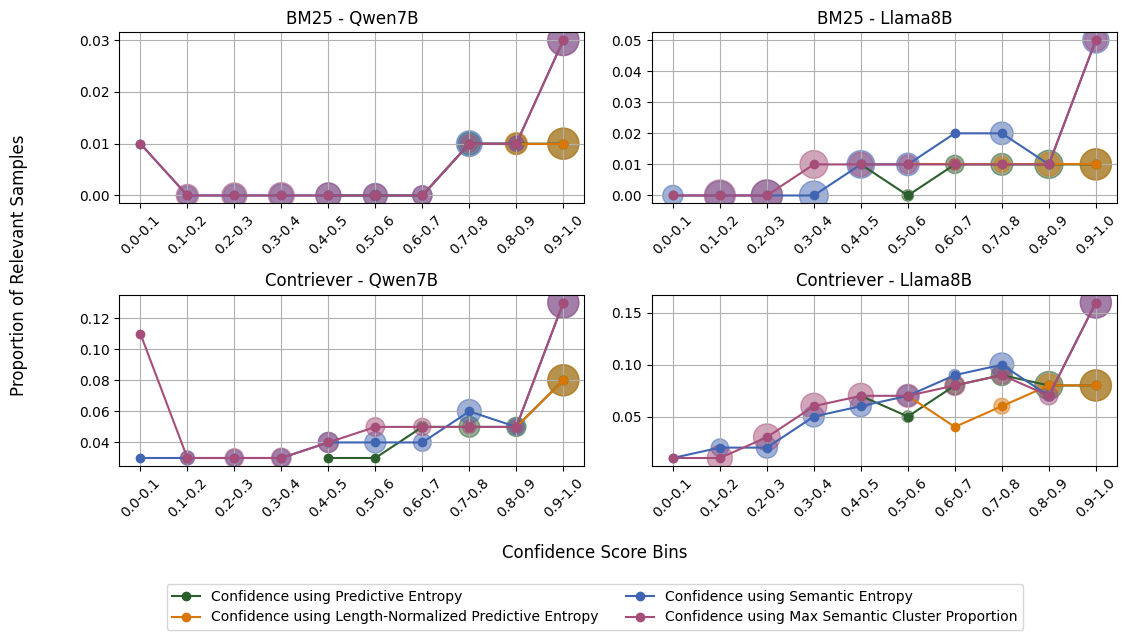

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define color and label mappings
color_mapping = {
    'cpe': '#2C5F2D',   # Dark pine green
    'cnpe': '#D97706',  # Warm amber
    'cse': '#4065B2',   # Deep sea blue
    'cmscp': '#A64D79', # Soft magenta
}

label_mapping = {
    'cpe': 'Confidence using Predictive Entropy',
    'cnpe': 'Confidence using Length-Normalized Predictive Entropy',
    'cse': 'Confidence using Semantic Entropy',
    'cmscp': 'Confidence using Max Semantic Cluster Proportion',
}

model_mapping = {
    'qwen7b': 'Qwen7B',
    'llama8b': 'Llama8B',
}

retriever_mapping = {
    'bm25': 'BM25',
    'contriever': 'Contriever',
}

# Define x-axis bin labels
bin_labels = [f'{i/10:.1f}-{(i+1)/10:.1f}' for i in range(10)]

# Read the CSV file (replace with actual path if needed)
df = pd.read_csv(percent_file)

def plot_calibration_curve(ax, df, retriever, model):
    """
    Plot calibration curves on the specified axis for a given retriever and model.
    
    Parameters:
        ax: Matplotlib axis object
        df: DataFrame containing calibration data
        retriever: Retriever name ('bm25' or 'contriever')
        model: Model name ('qwen7b' or 'llama8b')
    """
    df_filtered = df[(df['retriever'] == retriever) & (df['model'] == model)]
    min_size = 10
    max_size = 500
    
    for metric in ['cpe', 'cnpe', 'cse', 'cmscp']:
        row = df_filtered[df_filtered['metric'] == metric].iloc[0]
        bin_data = []
        
        for bin_label in bin_labels:
            value = row[bin_label]
            relevant_str, bin_str = value.split('|')
            relevant = float(relevant_str) / 100  # Convert to proportion
            bin_pct = float(bin_str)
            if bin_pct > 0:
                bin_data.append((bin_label, relevant, bin_pct))
        
        if bin_data:
            bin_labels_metric, relevant_percentages, bin_percentages = zip(*bin_data)
            x_positions = [bin_labels.index(label) for label in bin_labels_metric]
            
            log_bin_sizes = np.log(np.array(bin_percentages) + 1)
            if log_bin_sizes.max() > log_bin_sizes.min():
                normalized_sizes = min_size + (max_size - min_size) * \
                    (log_bin_sizes - log_bin_sizes.min()) / (log_bin_sizes.max() - log_bin_sizes.min())
            else:
                normalized_sizes = [min_size] * len(bin_percentages)
            
            ax.plot(x_positions, relevant_percentages, marker='o', linestyle='-', 
                   color=color_mapping[metric], label=label_mapping[metric])
            ax.scatter(x_positions, relevant_percentages, s=normalized_sizes, 
                      color=color_mapping[metric], alpha=0.5)
    
    ax.set_title(f'{retriever_mapping[retriever]} - {model_mapping[model]}')
    ax.set_xticks(range(len(bin_labels)))
    ax.set_xticklabels(bin_labels, rotation=45)
    ax.grid(True)
    return ax

# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Define retriever and model combinations
combinations = [
    ('bm25', 'qwen7b'),
    ('bm25', 'llama8b'),
    ('contriever', 'qwen7b'),
    ('contriever', 'llama8b')
]

# Plot each subplot
for ax, (retriever, model) in zip(axes.flatten(), combinations):
    plot_calibration_curve(ax, df, retriever, model)

# Remove individual axis labels
for ax in axes.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')

# Add shared x-axis label
fig.text(0.5, 0.02, 'Confidence Score Bins', ha='center', va='center', fontsize=12)

# Add shared y-axis label
fig.text(0.02, 0.5, 'Proportion of Relevant Samples', ha='center', va='center', rotation='vertical', fontsize=12)

# Add shared legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.12))

# Adjust layout and save (replace path as needed)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.savefig(figure_path, bbox_inches='tight')
plt.show()